In [ ]:
import pandas as pd

In [ ]:
# https://github.com/skathirmani/datasets

In [ ]:
tweets_url = 'https://raw.githubusercontent.com/skathirmani/datasets/refs/heads/main/narendramodi_tweets.csv'

In [ ]:
tweets = pd.read_csv(tweets_url)

In [ ]:
tweets.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [ ]:
tweets['date'] = pd.to_datetime(tweets['created_at'],
                                format='%Y-%m-%d %H:%M:%S')
tweets.dtypes

,0
id,float64
retweets_count,float64
favorite_count,float64
created_at,object
text,object
lang,object
retweeted,bool
followers_count,float64
friends_count,float64
hashtags_count,float64


In [ ]:
tweets['day'] = tweets['date'].dt.day
tweets['month'] = tweets['date'].dt.month
tweets['year'] = tweets['date'].dt.year
tweets['year_month'] = tweets['date'].dt.strftime('%Y_%m')

#tweets[['date', 'day', 'month', 'year', 'year_month']]

In [ ]:
monthwise_tweets = tweets.groupby(
    'year_month').agg(Total_tweets=('id', 'count'))
monthwise_tweets['Total_tweets']

,Total_tweets
year_month,
2016_03,157
2016_04,201
2016_05,307
2016_06,413
2016_07,303
2016_08,383
2016_09,292
2016_10,393
2016_11,255


### Resampling time data

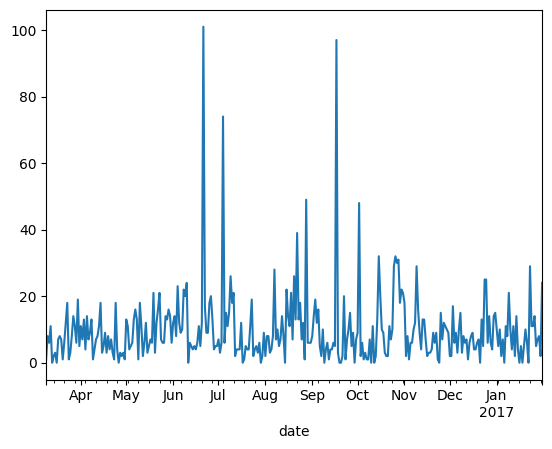

In [ ]:
ts = tweets.resample(on='date', rule='d')['id'].count()
ts.plot.line();

In [ ]:
ts = tweets.resample(on='date', rule='d')['id'].count()

In [ ]:
# pd.date_range

### Handling missing values
-

In [ ]:
import numpy as np
x = pd.Series([1, 2, np.nan, 5, 8, np.nan],
              )
df = pd.DataFrame({
    'sales': x
})
df['fill_mean'] = df['sales'].fillna(df['sales'].mean())
df['bfill'] = df['sales'].fillna(method='bfill')
df['ffill'] = df['sales'].fillna(method='ffill')
df['interpolate'] = df['sales'].interpolate()
df

<ipython-input-20-3c1c754e25ca>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['bfill'] = df['sales'].fillna(method='bfill')
<ipython-input-20-3c1c754e25ca>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ffill'] = df['sales'].fillna(method='ffill')


,sales,fill_mean,bfill,ffill,interpolate
0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,2.0,2.0,2.0
2,NaN,4.0,5.0,2.0,3.5
3,5.0,5.0,5.0,5.0,5.0
4,8.0,8.0,8.0,8.0,8.0
5,NaN,4.0,NaN,8.0,8.0


### Splitting data in to training and testing

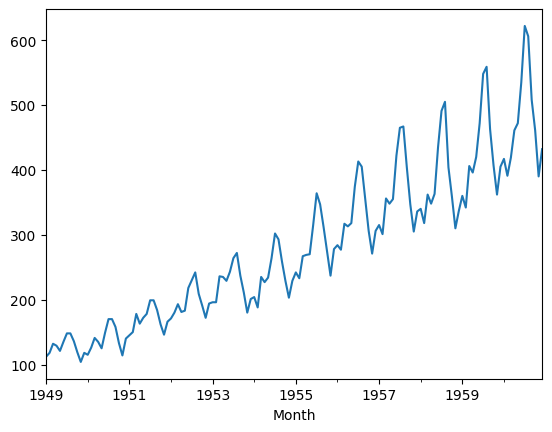

In [ ]:
passengers_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/refs/heads/master/airline-passengers.csv'
passengers = pd.read_csv(passengers_url)
passengers['Month'] = pd.to_datetime(passengers['Month'],
                                     format='%Y-%m')
#passengers.plot.line(x='Month', y='Passengers');

ts_passengers = passengers.set_index('Month')['Passengers']
#type(ts_passengers)
ts_passengers.plot.line();

In [ ]:
ts_passengers.shape

(144,)

In [ ]:
ts_train = ts_passengers[:100]
ts_test = ts_passengers[100:]

In [ ]:
ts_test_pred = pd.Series(
    [ts_train.mean()]*len(ts_test),
    index=ts_test.index)

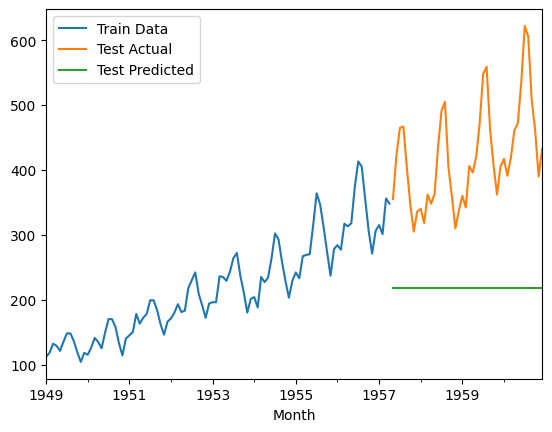

In [ ]:
import matplotlib.pyplot as plt
ts_train.plot.line()
ts_test.plot.line()
ts_test_pred.plot.line();
plt.legend(['Train Data', 'Test Actual', 'Test Predicted']);

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(ts_test, ts_test_pred, squared=False)
rmse

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


216.64411025710095

In [ ]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(ts_test, ts_test_pred)
rmse

216.64411025710095

In [ ]:
#ts_train

In [ ]:
start_date = ts_train.index[0]
end_date = ts_train.index[-1]
dates = pd.date_range(
    start=start_date,
    end=end_date,
    freq='MS')
len(dates), len(ts_train)

(100, 100)

### Moving Average

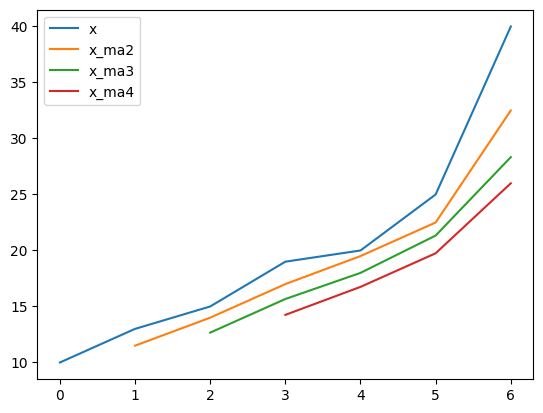

In [ ]:
x = pd.Series([10, 13, 15, 19, 20, 25, 40])
#x.plot.line();
df_ma = pd.DataFrame({
    'x': x,
    'x_ma2': x.rolling(2).mean(),
    'x_ma3': x.rolling(3).mean(),
    'x_ma4': x.rolling(4).mean()

})
df_ma.plot.line();


In [ ]:
df_ma

,x,x_ma2,x_ma3,x_ma4
0,10,NaN,NaN,NaN
1,13,11.5,NaN,NaN
2,15,14.0,12.666667,NaN
3,19,17.0,15.666667,14.25
4,20,19.5,18.000000,16.75
5,25,22.5,21.333333,19.75
6,40,32.5,28.333333,26.00


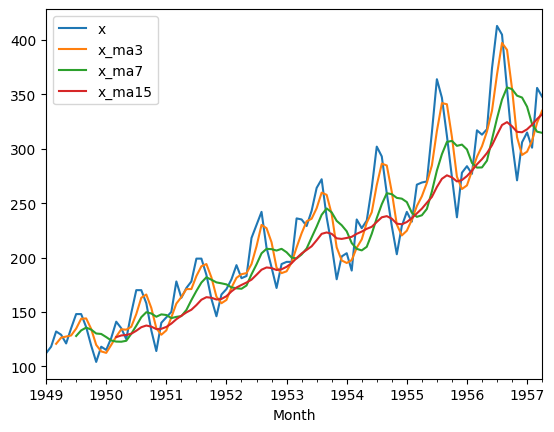

In [ ]:
df_airpass_ma = pd.DataFrame({
    'x': ts_train,
    'x_ma3': ts_train.rolling(3).mean(),
    'x_ma7': ts_train.rolling(7).mean(),
    'x_ma15': ts_train.rolling(15).mean(),

})
df_airpass_ma.plot.line();


In [ ]:
airpass_ma3 = ts_train.rolling(3).mean()
#airpass_ma3.tail(5)

In [ ]:
ts_test_pred = pd.Series(
    [airpass_ma3.iloc[-1]]*len(ts_test),
    index=ts_test.index)


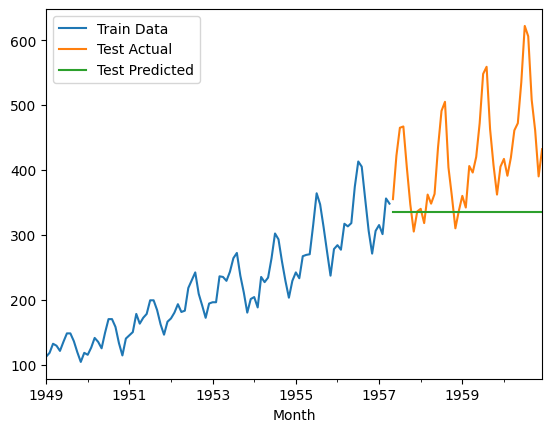

In [ ]:
ts_train.plot.line()
ts_test.plot.line()
ts_test_pred.plot.line();
plt.legend(['Train Data', 'Test Actual', 'Test Predicted']);

In [ ]:
rmse = root_mean_squared_error(ts_test, ts_test_pred)
rmse

115.11644302420682

### Exponential Smoothing
- Simple Exponential smoothing
- Double exponential smoothing (Holts method)
- Triple exponential smoothing (Holt-Winters method)

In [ ]:
yt = 445.36
alpha = 0.1
l0 = 446.59
lt = alpha * yt + (1-alpha)*l0
lt

446.467

In [ ]:
alpha = 0.8
ts = [alpha, alpha*(1-alpha), np.square(1-alpha)]
ts

[0.8, 0.15999999999999998, 0.03999999999999998]

In [ ]:
np.sum(ts)

1.0

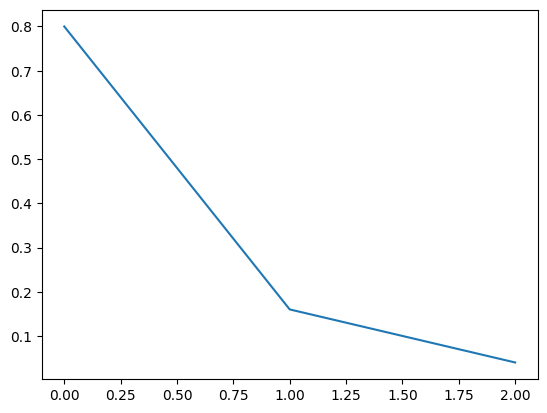

In [ ]:
pd.Series(ts).plot.line();

#### Simple Exponential smoothing

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
model_ses = SimpleExpSmoothing(ts_train,
                               initialization_method='estimated')
model_ses_autofit = model_ses.fit(optimized=True)
#model_ses_autofit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


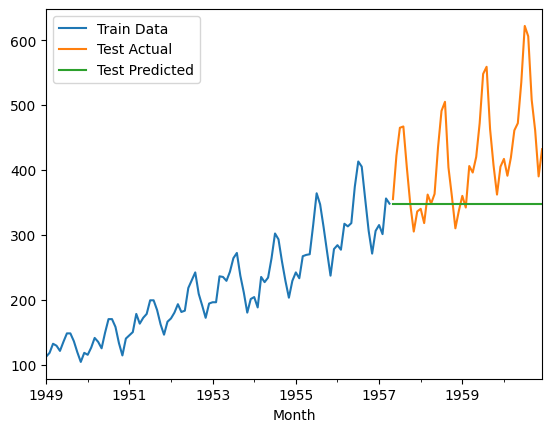

In [ ]:
ts_test_pred = model_ses_autofit.forecast(steps=len(ts_test))
ts_train.plot.line()
ts_test.plot.line()
ts_test_pred.plot.line();
plt.legend(['Train Data', 'Test Actual', 'Test Predicted']);

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


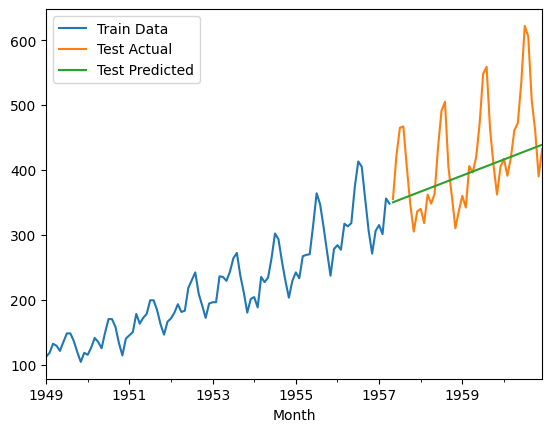

In [ ]:
from statsmodels.tsa.api import Holt

model_holt = Holt(ts_train, initialization_method='estimated')
model_holt_fitted = model_holt.fit(optimized=True)
ts_test_pred = model_holt_fitted.forecast(steps=len(ts_test))

ts_train.plot.line()
ts_test.plot.line()
ts_test_pred.plot.line();
plt.legend(['Train Data', 'Test Actual', 'Test Predicted']);


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


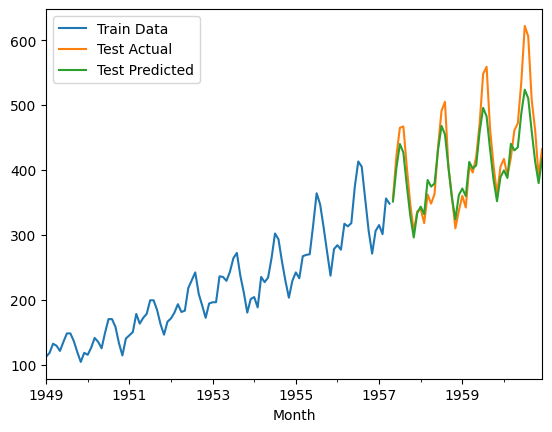

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

model_holt_winter = ExponentialSmoothing(
    ts_train,
    trend='additive',
    seasonal='additive',
    initialization_method='estimated')
model_holt_winter_fitted = model_holt_winter.fit(optimized=True)
ts_test_pred = model_holt_winter_fitted.forecast(steps=len(ts_test))

ts_train.plot.line()
ts_test.plot.line()
ts_test_pred.plot.line();
plt.legend(['Train Data', 'Test Actual', 'Test Predicted']);


### Random noise data

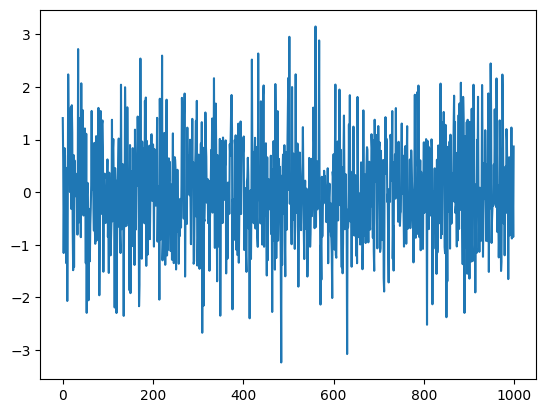

In [ ]:
import numpy as np
import pandas as pd
x = np.random.normal(0,1,1000)
pd.Series(x).plot.line();

In [ ]:
#pd.Series(x).plot.density();

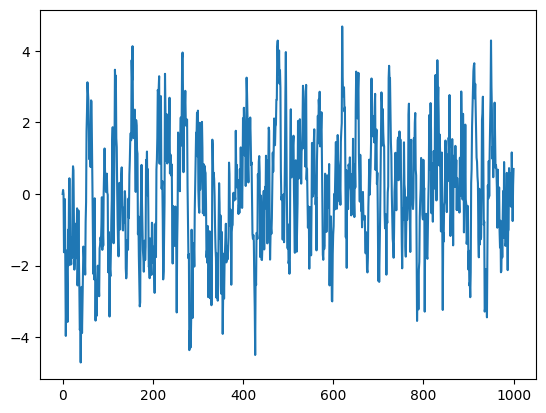

In [ ]:
y0 = 0
y = [y0]
for i in range(1000):
  curr_value = 0.8 * y[-1] + np.random.normal()
  y.append(curr_value)
ts = pd.Series(y)
ts.plot.line();

### AutoCorrelation(ACF) Plot

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

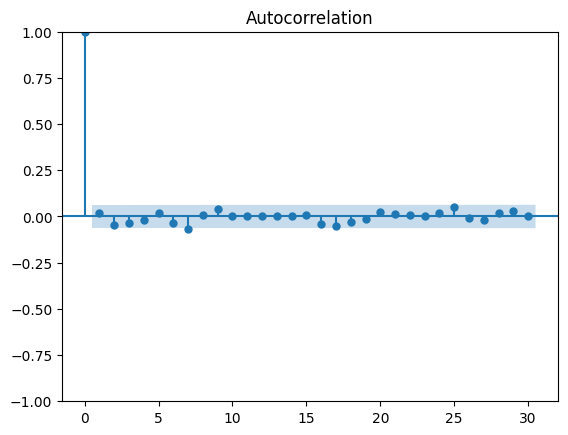

In [ ]:
# ACF plot of random signal
plot_acf(x);

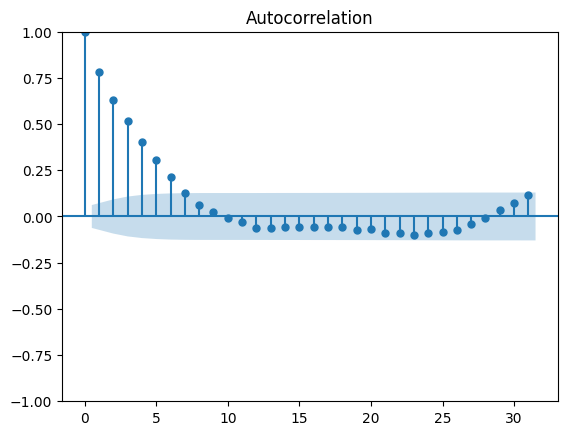

In [ ]:
plot_acf(ts);

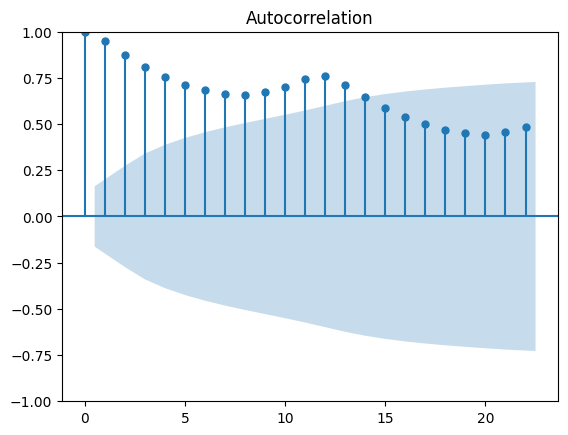

In [ ]:
plot_acf(ts_passengers);

#### MA Models

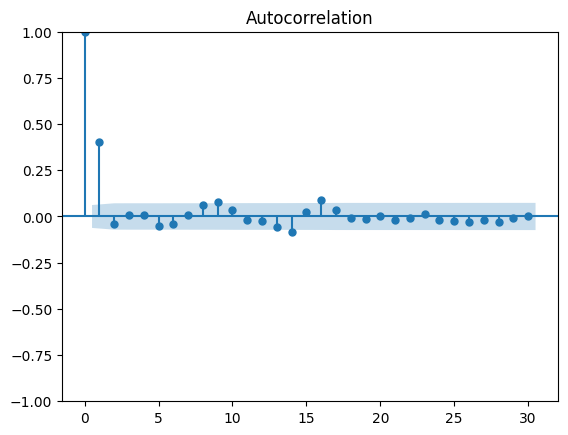

In [ ]:
e0 = np.random.normal()
errors = [e0]
y = []


for i in range(1000):
  curr_error = np.random.normal()

  curr_value = 0.6 * errors[-1] + curr_error

  errors.append(curr_error)
  y.append(curr_value)

y = pd.Series(y)
plot_acf(y);

### AR(1) model

In [ ]:
y0 = 0
y = [y0]
for i in range(1000):
  curr_value = 0.8 * y[-1] + np.random.normal()
  y.append(curr_value)
ts = pd.Series(y)
ts.plot.line();

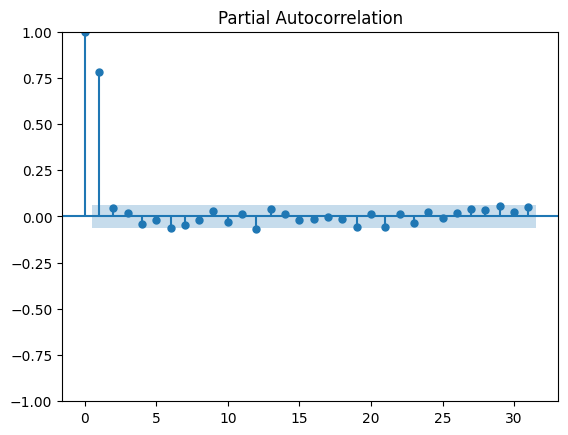

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ts);

### Decomposing time series data



In [ ]:
import numpy as np

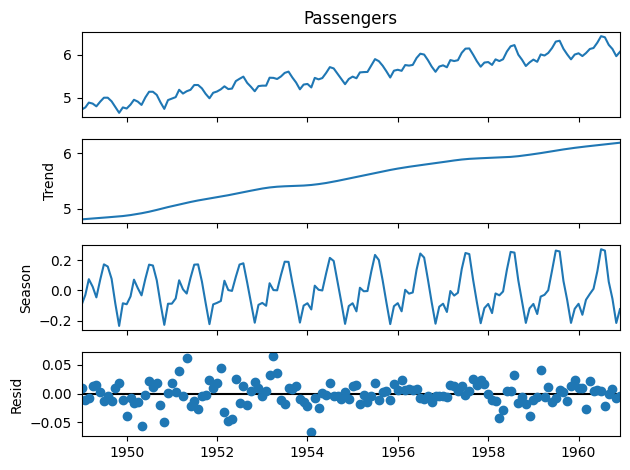

In [ ]:
from statsmodels.tsa.seasonal import STL
stl = STL(ts_passengers);
res = stl.fit()
fig = res.plot()

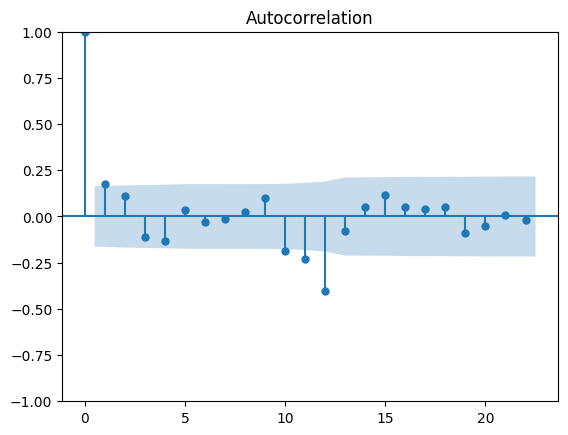

In [ ]:
plot_acf(res.resid);

### Hypothesis for testing stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
## Ho: time series is non-stationary
## Ha: time series is stationary

### Accept null hypothesis: p>=0.05
### Reject null hypotheis: p<0.05

In [ ]:
results = adfuller(res.resid)
pvalue = results[1]
pvalue

1.6014817739577378e-07

### Differencing to remove trend

In [ ]:
x = pd.Series([10, 12, 15, 16, 18])
x.diff().fillna(x).cumsum()

,0
0,10.0
1,12.0
2,15.0
3,16.0
4,18.0


In [ ]:
stocks = pd.read_csv('/content/stocks_google.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'],
                                format='%m/%d/%Y %H:%M:%S')
ts_google = stocks.resample(on='Date', rule='1d')['Close'].min()
ts_google = ts_google.fillna(method='ffill')
#ts_google.plot.line();
#plot_acf(ts_google)

<ipython-input-42-566c9d92b40b>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_google = ts_google.fillna(method='ffill')


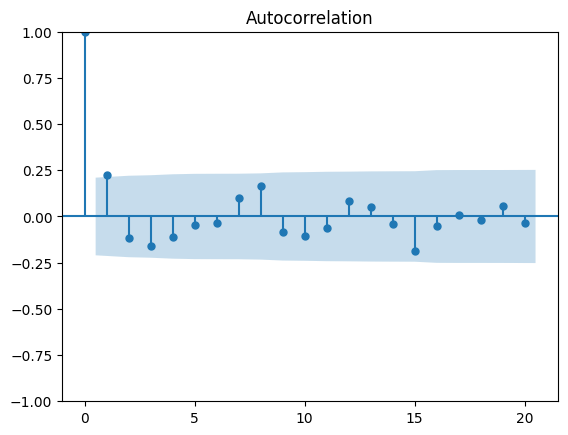

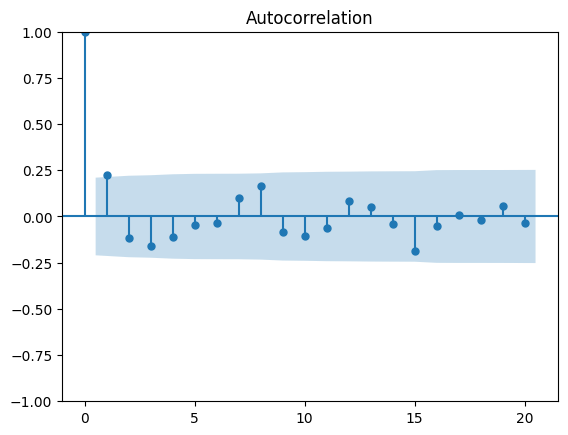

In [ ]:
ts_google_diff = ts_google.diff()
#ts_google_diff.plot.line();
plot_acf(ts_google_diff.dropna())

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(ts_train,
              order=(1,1,0),
              seasonal_order=(1, 1, 0, 12),
              )
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                       Passengers   No. Observations:                  100
Model:             ARIMA(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -319.101
Date:                          Sun, 01 Dec 2024   AIC                            644.203
Time:                                  11:54:38   BIC                            651.601
Sample:                              01-01-1949   HQIC                           647.182
                                   - 04-01-1957                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2434      0.097     -2.512      0.012      -0.433      -0.054
ar.S.L12      -0.2127      0.087     -2.432      0.015      -0.384      -0.041
sigma2        89.1842     14.080      6.334      0.000      61.587     116.781
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.97   Prob(JB):                         0.30
Heteroskedasticity (H):               1.32   Skew:                             0.40
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

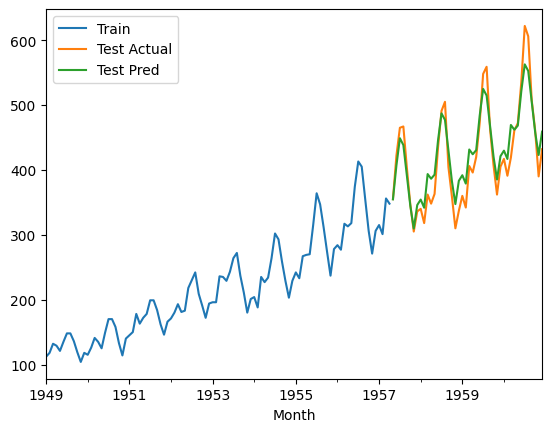

In [ ]:
import matplotlib.pyplot as plt
ts_test_pred = model_fit.get_forecast(steps=len(ts_test)).predicted_mean

ts_train.plot.line()
ts_test.plot.line()
ts_test_pred.plot.line()
plt.legend(['Train', 'Test Actual', 'Test Pred']);

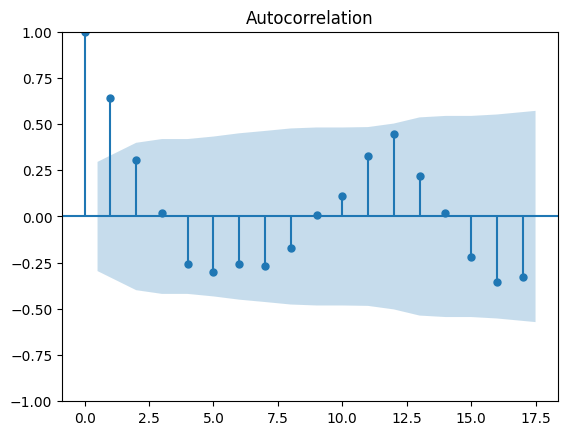

In [ ]:
residual = ts_test - ts_test_pred
plot_acf(residual);

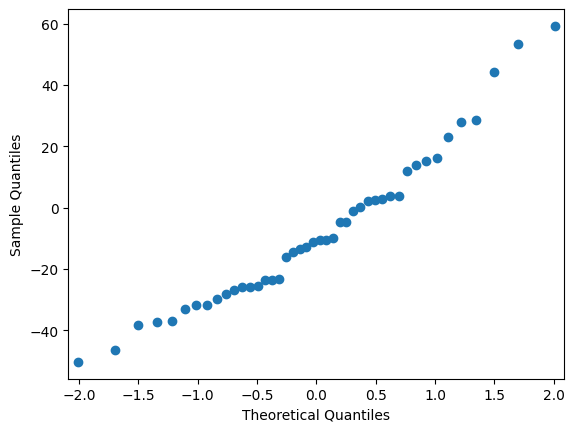

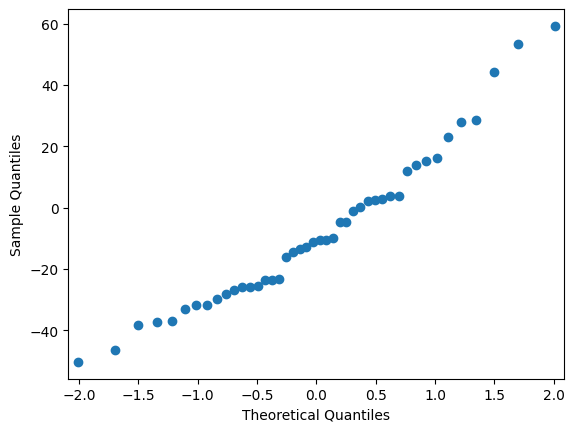

In [ ]:
#residual.plot.density()
from statsmodels.graphics.gofplots import qqplot
qqplot(residual)